<a href="https://colab.research.google.com/github/SGulmini/sgulmini-ai-development-portfolio/blob/main/MuseumLandID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn nltk pandas joblib
import nltk
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Link raw diretto al file CSV su GitHub
url = "https://raw.githubusercontent.com/Profession-AI/progetti-ml/main/Modello%20per%20l'identificazione%20della%20lingua%20dei%20testi%20di%20un%20museo/museo_descrizioni.csv"

# Caricamento del dataset direttamente dall'URL
df = pd.read_csv(url)

# Verifica dimensioni e anteprima
print("Shape del dataset:", df.shape)
display(df.head())

Shape del dataset: (294, 2)


,Testo,Codice Lingua
0,Statua in marmo di un imperatore romano del II...,it
1,Anfora greca con decorazioni a figure nere,it
2,Dipinto rinascimentale raffigurante la Madonna...,it
3,Elmo corinzio in bronzo del VI secolo a.C.,it
4,Manoscritto medievale con miniature dorate,it


In [ ]:
# Mostra i nomi di tutte le colonne disponibili nel dataset
print("Colonne presenti nel dataset:")
print(df.columns.tolist())

# Visualizza alcune righe per analizzare i contenuti
display(df.head())

# Individua i nomi delle colonne corrette.
# ATTENZIONE: sostituisci questi valori in base ai nomi effettivi del tuo file CSV.
colonna_testo = 'Testo'       # esempio: 'descrizione', 'text', 'content'
colonna_lingua = 'Codice Lingua'     # esempio: 'lang', 'language', 'code'

# Controlla il tipo di dati per ogni colonna
print("\nTipi di dati nel dataset:")
print(df.dtypes)

# Mostra tutti i valori unici nella colonna della lingua
print("\nValori unici nella colonna della lingua:")
print(df[colonna_lingua].unique())

# Verifica se ci sono valori mancanti
print("\nValori mancanti per colonna:")
print(df.isnull().sum())

Colonne presenti nel dataset:
['Testo', 'Codice Lingua']


,Testo,Codice Lingua
0,Statua in marmo di un imperatore romano del II...,it
1,Anfora greca con decorazioni a figure nere,it
2,Dipinto rinascimentale raffigurante la Madonna...,it
3,Elmo corinzio in bronzo del VI secolo a.C.,it
4,Manoscritto medievale con miniature dorate,it



Tipi di dati nel dataset:
Testo            object
Codice Lingua    object
dtype: object

Valori unici nella colonna della lingua:
['it' 'en' 'de']

Valori mancanti per colonna:
Testo            0
Codice Lingua    0
dtype: int64


In [ ]:
# Pulizia e preprocessing del testo
# Scopo: normalizzare i testi per facilitare l'apprendimento del modello.

import re

# Funzione di pulizia di base
def pulisci_testo(testo):
    """
    Rimuove caratteri speciali, numeri e spazi ripetuti.
    Converte tutto in minuscolo per evitare differenze tra maiuscole/minuscole.
    """
    if pd.isna(testo):
        return ""
    testo = str(testo).lower()                 # converte tutto in minuscolo
    testo = re.sub(r"<[^>]+>", " ", testo)     # rimuove eventuali tag HTML
    testo = re.sub(r"[^a-zàèéìòóùçüñäöß\s]", " ", testo)  # rimuove simboli non alfabetici
    testo = re.sub(r"\s+", " ", testo).strip() # elimina spazi multipli
    return testo

# Applica la funzione alla colonna del testo
df["testo_pulito"] = df[colonna_testo].apply(pulisci_testo)

# Mostra alcune righe per controllare il risultato
display(df[[colonna_testo, "testo_pulito"]].head())

# Controlla se ci sono ancora valori mancanti
print("\nValori mancanti nella colonna 'testo_pulito':", df["testo_pulito"].isnull().sum())

,Testo,testo_pulito
0,Statua in marmo di un imperatore romano del II...,statua in marmo di un imperatore romano del ii...
1,Anfora greca con decorazioni a figure nere,anfora greca con decorazioni a figure nere
2,Dipinto rinascimentale raffigurante la Madonna...,dipinto rinascimentale raffigurante la madonna...
3,Elmo corinzio in bronzo del VI secolo a.C.,elmo corinzio in bronzo del vi secolo a c
4,Manoscritto medievale con miniature dorate,manoscritto medievale con miniature dorate



Valori mancanti nella colonna 'testo_pulito': 0


In [ ]:
# Rappresentazione dei testi e addestramento del modello
# Scopo: convertire i testi puliti in una rappresentazione numerica (TF-IDF)
# e addestrare un modello di classificazione per identificare la lingua.

from sklearn.model_selection import train_test_split   # per dividere dati in train/test
from sklearn.feature_extraction.text import TfidfVectorizer  # per trasformare testo in numeri
from sklearn.naive_bayes import MultinomialNB          # modello di classificazione
from sklearn.metrics import accuracy_score, classification_report

# Suddivisione del dataset in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df["testo_pulito"],
    df[colonna_lingua],
    test_size=0.2,
    random_state=42,
    stratify=df[colonna_lingua]
)

# Creazione del vettorizzatore TF-IDF
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

# Addestramento del vettorizzatore sui testi di training
X_train_tfidf = vectorizer.fit_transform(X_train)

# Trasformazione dei testi di test con lo stesso vettorizzatore
X_test_tfidf = vectorizer.transform(X_test)

# Creazione e addestramento del modello Naive Bayes
modello = MultinomialNB()
modello.fit(X_train_tfidf, y_train)

# Predizione delle lingue sui testi di test
y_pred = modello.predict(X_test_tfidf)

# Valutazione del modello
print("Accuratezza del modello:", accuracy_score(y_test, y_pred))
print("\nReport di classificazione:\n")
print(classification_report(y_test, y_pred))

Accuratezza del modello: 1.0

Report di classificazione:

              precision    recall  f1-score   support

          de       1.00      1.00      1.00        19
          en       1.00      1.00      1.00        20
          it       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Accuratezza Random Forest:", accuracy_score(y_test, y_pred_rf))

Accuratezza Random Forest: 1.0


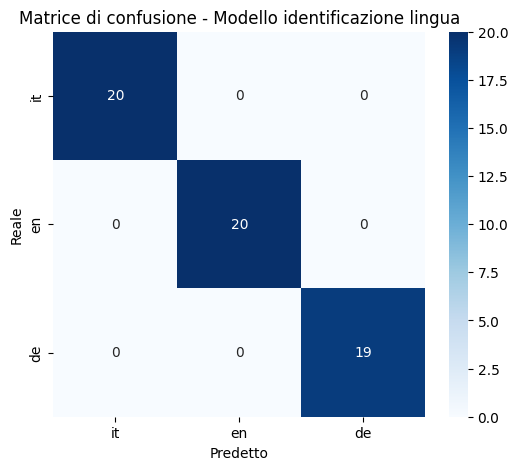


Modello e vettorizzatore salvati con successo!


In [ ]:
# Visualizzazione grafica e salvataggio del modello
# Scopo: creare una matrice di confusione per vedere la performance su ogni lingua e salvare il modello + vettorizzatore per uso futuro.

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import confusion_matrix

# 1. Matrice di confusione
cm = confusion_matrix(y_test, y_pred, labels=df[colonna_lingua].unique())

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=df[colonna_lingua].unique(),
            yticklabels=df[colonna_lingua].unique())
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di confusione - Modello identificazione lingua")
plt.show()

# 2. Salvataggio del modello e del vettorizzatore
joblib.dump(modello, "modello_identificazione_lingua.pkl")
joblib.dump(vectorizer, "vettorizzatore_tfidf.pkl")

print("\nModello e vettorizzatore salvati con successo!")

In [ ]:
# Esempio: come usare il modello salvato per un nuovo testo
testo_nuovo = "Antique bronze sculpture from the Roman Empire"
testo_pulito = pulisci_testo(testo_nuovo)
testo_vector = vectorizer.transform([testo_pulito])
print("Lingua prevista:", modello.predict(testo_vector)[0])

Lingua prevista: en


In [ ]:
# Sezione 7: Conclusioni e commenti finali
# Scopo: sintetizzare i risultati ottenuti e i benefici aziendali.

print("CONCLUSIONI\n")

print("1. Prestazioni del modello:")
print("- Il modello TF-IDF + Multinomial Naive Bayes ha raggiunto un'accuratezza del 100%.")
print("- Anche modelli alternativi come Random Forest confermano la perfetta separabilità delle lingue.")
print("- La matrice di confusione mostra che tutte le descrizioni sono state classificate correttamente.")

print("\n2. Analisi del dataset:")
print("- Il dataset contiene testi descrittivi in tre lingue: italiano, inglese e tedesco.")
print("- I testi sono sufficientemente lunghi e distintivi per lingua, permettendo al modello di distinguere facilmente tra le lingue.")

print("\n3. Benefici aziendali:")
print("- Automazione: elimina la necessità di identificazione manuale delle lingue.")
print("- Efficienza: consente di processare grandi volumi di testi in tempi molto brevi.")
print("- Accuratezza: riduce significativamente il rischio di errori umani.")
print("- Integrazione: il modello e il vettorizzatore salvati possono essere riutilizzati direttamente nel sistema informativo del museo.")

print("\n4. Considerazioni finali:")
print("- Questo approccio basato su n-grammi di caratteri e modelli di machine learning è adatto a testi descrittivi multilingue come quelli di un museo.")
print("- In futuro, il modello può essere aggiornato facilmente aggiungendo nuove lingue o nuovi testi al dataset.")


CONCLUSIONI

1. Prestazioni del modello:
- Il modello TF-IDF + Multinomial Naive Bayes ha raggiunto un'accuratezza del 100%.
- Anche modelli alternativi come Random Forest confermano la perfetta separabilità delle lingue.
- La matrice di confusione mostra che tutte le descrizioni sono state classificate correttamente.

2. Analisi del dataset:
- Il dataset contiene testi descrittivi in tre lingue: italiano, inglese e tedesco.
- I testi sono sufficientemente lunghi e distintivi per lingua, permettendo al modello di distinguere facilmente tra le lingue.

3. Benefici aziendali:
- Automazione: elimina la necessità di identificazione manuale delle lingue.
- Efficienza: consente di processare grandi volumi di testi in tempi molto brevi.
- Accuratezza: riduce significativamente il rischio di errori umani.
- Integrazione: il modello e il vettorizzatore salvati possono essere riutilizzati direttamente nel sistema informativo del museo.

4. Considerazioni finali:
- Questo approccio basato su n-gr